<a href="https://datamics.com/de/courses/"><img src=../DATA/bg_datamics_top.png></a>

<em text-align:center>© Datamics</em>
# Gestapelter Autoencoder (Eng.: Stacked Autoencoder)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("../03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
tf.reset_default_graph() 

## Parameter

In [6]:
# 784
# 392
# 196
# 392
# 784

In [7]:
num_inputs = 784 # 28*28
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = neurons_hid1 # Decoder beginnt
num_outputs = num_inputs

learning_rate = 0.01

### Platzhalter

In [9]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

### Gewichte

Initialisierer, der in der Lage ist, seine Skalierung an die Form von Gewichts-Tensoren anzupassen.

Mit `distribution="normal"` werden Stichproben aus einer abgeschnittenen Normalen gezogen
Verteilung zentriert auf Null, mit `stddev = sqrt(scale / n)`
wo n ist:

    -Anzahl der Inputs Units im Gewichtstensor, wenn Modus = "fan_in".
    -Anzahl der Output Units, wenn Modus = "fan_out".
    -Mittelwert der Anzahl der Ein- und Ausgabeeinheiten, wenn mode = "fan_avg".
    
Mit `distribution="uniform"` werden Proben aus einer gleichmäßigen Verteilung gezogen
innerhalb von [-limit, limit], mit `limit = sqrt(3 * scale / n)`.

In [10]:
initializer = tf.variance_scaling_initializer() 
# Viel besseres Training da es der größe der Hidden layers angepasst ist. 
# Vorallem wenn wir einen großes ändernug haben

In [11]:
w1 = tf.Variable(initializer([num_inputs, neurons_hid1]), dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hid1, neurons_hid2]), dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hid2, neurons_hid3]), dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hid3, num_outputs]), dtype=tf.float32)

### Biase (Vorurteile)

In [12]:
b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))

### Aktivierungsfunktion und Layers

In [13]:
act_func = tf.nn.relu

In [14]:
hid_layer1 = act_func(tf.matmul(X, w1) + b1)
hid_layer2 = act_func(tf.matmul(hid_layer1, w2) + b2)
hid_layer3 = act_func(tf.matmul(hid_layer2, w3) + b3)
output_layer = tf.matmul(hid_layer3, w4) + b4

### Verlustfunktion

In [15]:
loss = tf.reduce_mean(tf.square(output_layer - X))

### Optimierer

In [16]:
#tf.train.RMSPropOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate)

In [17]:
train = optimizer.minimize(loss)

### Variablen initialisieren

In [18]:
init = tf.global_variables_initializer()

In [19]:
saver = tf.train.Saver() 

In [25]:
num_epochs = 5 
batch_size = 150

with tf.Session() as sess:
    sess.run(init)
    
    # Epoch == Gesamtes Trainingsset
    for epoch in range(num_epochs):
        
        num_batches = mnist.train.num_examples // batch_size # Keinen Dezimalpunkt
        
        # Batch Größe 150
        for iteration in range(num_batches):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict={X: X_batch})
            
        training_loss = loss.eval(feed_dict={X: X_batch})   
        
        print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))
     
    saver.save(sess, "./example_stacked_autoencoder.ckpt")      

Epoch 0 Complete. Training Loss: 0.035517871379852295
Epoch 1 Complete. Training Loss: 0.03381755203008652
Epoch 2 Complete. Training Loss: 0.03240483999252319
Epoch 3 Complete. Training Loss: 0.031387414783239365
Epoch 4 Complete. Training Loss: 0.034701425582170486


## Testen des Autoencoder Outputs auf Testdaten 

In [27]:
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess,"./example_stacked_autoencoder.ckpt")
    
    results = output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]}) # hid_layer2

INFO:tensorflow:Restoring parameters from ./example_stacked_autoencoder.ckpt


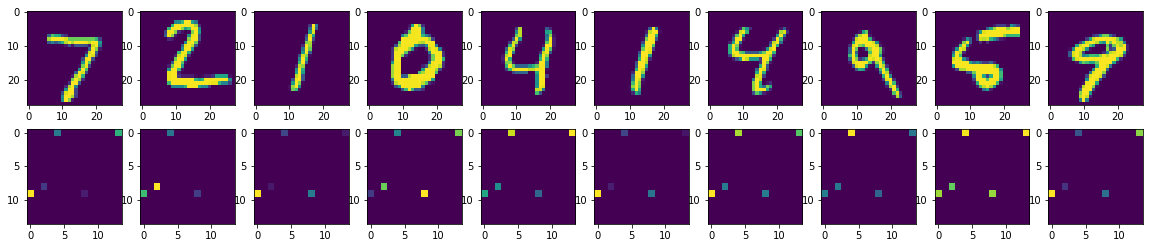

In [28]:
# Originalbilder mit ihren Rekonstruktionen vergleichen
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (28, 28))) # 14, 14 

# Gut gemacht!